In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./image/lenna.jpg',0)

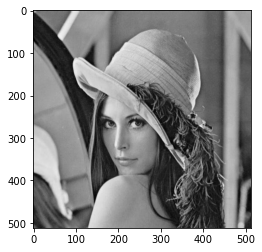

In [3]:
plt.imshow(img,cmap='gray')

In [4]:
img.shape

(512, 512)

## motion blur kernel

In [5]:
kernel_size=30
kernel = np.zeros((kernel_size, kernel_size))
half=kernel_size/2
for i in range(0,kernel_size):
    for j in range(0,kernel_size):
        #print((np.pi*(0.1*(i-half)+0.1*(j-half))))
        if(((i-half)==0 and (j-half)==0)):
            kernel[i][j]=1
            #print((np.pi*(0.1*(i-half)+0.1*(j-half))))
            #print('i,j:,',i,j)
        else:
            if((np.pi*(0.1*(i-half)+0.1*(j-half))==0)):
                #print((np.pi*(0.1*(i-half)+0.1*(j-half))))
                #print('i,j:,',i,j)
                kernel[i][j]=1
            else:
                kernel[i][j]=0
                #kernel[i][j]=1/(np.pi*(0.1*(i-half)+0.1*(j-half)))*np.sin(np.around(np.pi*(0.1*(i-half)+0.1*(j-half))))*np.exp(-np.around(np.pi*(0.1*(i-half)+0.1*(j-half))))

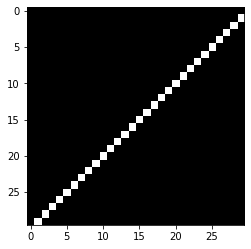

In [6]:
plt.imshow(kernel,cmap='gray')

In [7]:
# Save the kernel.
cv2.imwrite('kernel.jpg', kernel)

True

In [8]:
def make_blurred(input, PSF, eps):
    input_fft = np.fft.fft2(input)
    PSF_fft = np.fft.fft2(PSF) + eps
    blurred = np.fft.ifft2(input_fft * PSF_fft)
    blurred = np.abs(np.fft.fftshift(blurred))
    return blurred

In [9]:
kernel = np.pad(kernel,(241,241),'constant', constant_values=(0,0))

In [10]:
#data = np.asarray(image.getdata()).reshape(image.size)
blurred = np.abs(make_blurred(img, kernel, 1e-6))

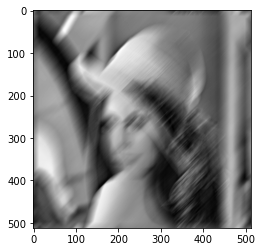

In [11]:
plt.imshow(blurred,cmap='gray')

In [12]:
kernel2 = kernel/kernel_size

In [13]:
def wiener(input, PSF, k):
    input_fft = np.fft.fft2(input)
    PSF_fft = np.fft.fft2(PSF) + k 
    result = np.fft.ifft2(input_fft / PSF_fft) #計算F(u,v)的傅立葉反變換
    result = np.abs(np.fft.fftshift(result))
    return result

In [14]:
wiener_result = wiener(blurred, kernel, 0.01+1e-3)

True

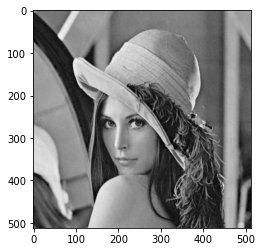

In [15]:
plt.imshow(wiener_result,cmap='gray')
cv2.imwrite('wiener_filter_lenna.jpg', wiener_result)

In [16]:
kernel2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
blurred.shape

(512, 512)

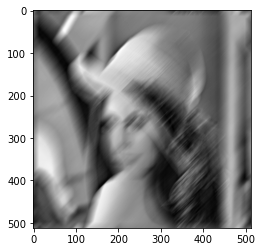

In [18]:
plt.imshow(blurred,cmap='gray')

In [ ]:
kernel.shape

In [ ]:
kernel2.shape

## Inverse filter
* Wiener filter在k=0時，等於inverse filter

In [ ]:
result = wiener(blurred, kernel, 0) #wiener k=0 reduce to inverse filter

In [ ]:
plt.imshow(result,cmap='gray')
cv2.imwrite('inverse_filter_lenna.jpg', result)

## inverse filter失敗作

In [ ]:
def full_inverse_filter(image, psf):
    psf_M = psf.shape[0]
    psf_N = psf.shape[1]
    # zero pad the psf in space domain to match the image size
    psf_padded = np.zeros_like(image)
    psf_padded[0:psf_M, 0:psf_N] = psf
    psf_padded = psf_padded / np.sum(psf_padded)
    #print(psf.shape)
    result = np.zeros_like(image)

    # compute dft of psf - H
    #dft = np.fft.fft2(image)
    psf_dft = np.fft.fft2(psf)
    # replace 0 value if present in H, to avoid division by zero
    psf_dft[psf_dft == 0] = 0.00001

    # compute F = G/H for each channel i.e. R, G and B separately
    #for i in range(0, 3):
    image_dft = np.fft.fft2(image)
    temp = np.abs(np.fft.ifft2(np.divide(image_dft, psf_dft)))
    result= temp.astype(np.uint32)

    return result

In [ ]:
inverse_filter_result = full_inverse_filter(blurred,kernel)

In [ ]:
plt.imshow(inverse_filter_result,cmap='gray')